## Predicting Traffic Crashes Using Machine Learning Methods:
### Naïve Bayes, Decision Trees, KNN and Random Forest
Anusha Arif – 1004519639 | Jasmine Multani - 1003912448 | Sarathy Kanahasan - 1002958347



### Import and Clean Dataset

In [63]:
# reading the data file 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
df = pd.read_csv("traffic_crashes.csv")
data2 = df[df.columns[df.isnull().mean() < .60]]
# data2.info()
data = data2.dropna()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193663 entries, 1 to 491458
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                193663 non-null  object 
 1   RD_NO                          193663 non-null  object 
 2   CRASH_DATE                     193663 non-null  object 
 3   POSTED_SPEED_LIMIT             193663 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         193663 non-null  object 
 5   DEVICE_CONDITION               193663 non-null  object 
 6   WEATHER_CONDITION              193663 non-null  object 
 7   LIGHTING_CONDITION             193663 non-null  object 
 8   FIRST_CRASH_TYPE               193663 non-null  object 
 9   TRAFFICWAY_TYPE                193663 non-null  object 
 10  LANE_CNT                       193663 non-null  float64
 11  ALIGNMENT                      193663 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [65]:
fct = data['FIRST_CRASH_TYPE'].unique()
fct_dict = {}
index5 = 0
for v in fct:
    fct_dict[v] = index5
    index5 += 1
fct_dict

key = pd.DataFrame(fct_dict.items(), columns = ['First crash type', 'Encoded Value']) 
key

,First crash type,Encoded Value
0,TURNING,0
1,ANGLE,1
2,REAR END,2
3,SIDESWIPE SAME DIRECTION,3
4,FIXED OBJECT,4
5,SIDESWIPE OPPOSITE DIRECTION,5
6,PARKED MOTOR VEHICLE,6
7,PEDESTRIAN,7
8,PEDALCYCLIST,8
9,OTHER OBJECT,9


Text(0, 0.5, 'Frequency in Dataset')

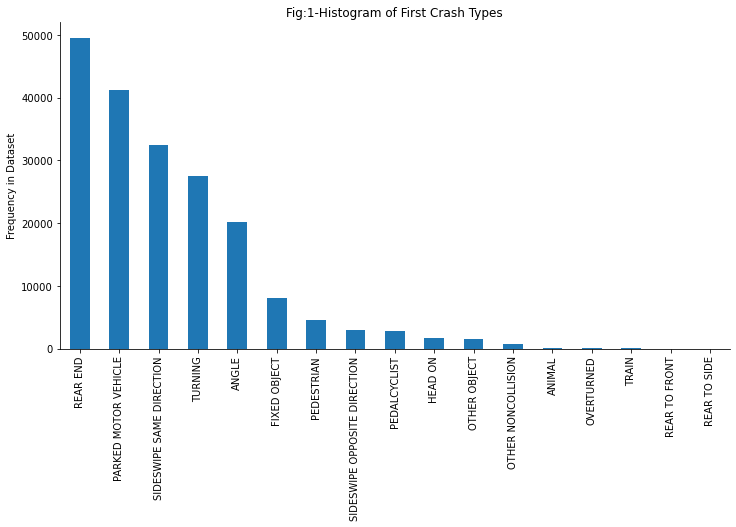

In [66]:
fig, ax1 = plt.subplots(figsize=(12,6))
data['FIRST_CRASH_TYPE'].value_counts().plot(kind= 'bar')
                                            
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Fig:1-Histogram of First Crash Types')
ax1.set_ylabel('Frequency in Dataset')

In [67]:
# standardize quantitative values
# first_crash = df3['FIRST_CRASH_TYPE'].unique()

# encode TRAFFIC_CONTROL_DEVICE
tcd = data['TRAFFIC_CONTROL_DEVICE'].unique()
tcd_dict = {}
index1 = 0
for t in tcd:
    tcd_dict[t] = index1
    index1 += 1
data.TRAFFIC_CONTROL_DEVICE = data.TRAFFIC_CONTROL_DEVICE.replace(tcd_dict)

# encode DEVICE_CONDITION
dcc = data['DEVICE_CONDITION'].unique()
dcc_dict = {}
index2 = 0
for x in dcc:
    dcc_dict[x] = index2
    index2 += 1
# dcc_dict
data.DEVICE_CONDITION = data.DEVICE_CONDITION.replace(dcc_dict)

# encode WEATHER_CONDITION
wc = data['WEATHER_CONDITION'].unique()
wc_dict = {}
index3 = 0
for y in wc:
    wc_dict[y] = index3
    index3 += 1
# wc_dict
data.WEATHER_CONDITION = data.WEATHER_CONDITION.replace(wc_dict)

# encode LIGHTING_CONDITION
lc = data['LIGHTING_CONDITION'].unique()
lc
lc_dict = {}
index4 = 0
for c in lc:
    lc_dict[c] = index4
    index4 += 1
# lc_dict
data.LIGHTING_CONDITION = data.LIGHTING_CONDITION.replace(lc_dict)

# encode FIRST_CRASH_TYPE
fct = data['FIRST_CRASH_TYPE'].unique()
fct_dict = {}
index5 = 0
for v in fct:
    fct_dict[v] = index5
    index5 += 1
# fct_dict
data.FIRST_CRASH_TYPE = data.FIRST_CRASH_TYPE.replace(fct_dict)

# encode TRAFFICWAY_TYPE 
tt = data['TRAFFICWAY_TYPE'].unique()
tt_dict = {}
index6 = 0
for g in tt:
    tt_dict[g] = index6
    index6 += 1
tt_dict
data.TRAFFICWAY_TYPE = data.TRAFFICWAY_TYPE.replace(tt_dict)

# encode ALIGNMENT type
a = data['ALIGNMENT'].unique()
a_dict = {}
index7 = 0
for o in a:
    a_dict[o] = index7
    index7 += 1
data.ALIGNMENT = data.ALIGNMENT.replace(a_dict)

# encode ROADWAY_SURFACE_COND  type
rsc = data['ROADWAY_SURFACE_COND'].unique()
rsc
rsc_dict = {}
index7 = 0
for q in rsc:
    rsc_dict[q] = index7
    index7 += 1
data.ROADWAY_SURFACE_COND = data.ROADWAY_SURFACE_COND.replace(rsc_dict)

# encode ROAD_DEFECT type
rd = data['ROAD_DEFECT'].unique()
rd_dict = {}
index8 = 0
for k in rd:
    rd_dict[k] = index8
    index8 += 1
data.ROAD_DEFECT = data.ROAD_DEFECT.replace(rd_dict)


# encode REPORT_TYPE type
rt = data['REPORT_TYPE'].unique()
rt_dict = {}
index9 = 0
for d in rt:
    rt_dict[d] = index9
    index9 += 1
data.REPORT_TYPE = data.REPORT_TYPE.replace(rt_dict)


# encode CRASH_TYPE type
ct = data['CRASH_TYPE'].unique()
ct_dict = {}
index10 = 0
for j in ct:
    ct_dict[j] = index10
    index10 += 1
data.CRASH_TYPE = data.CRASH_TYPE.replace(ct_dict)


# encode DAMAGE type
d = data['DAMAGE'].unique()
d_dict = {}
index11 = 0
for p in d:
    d_dict[p] = index11
    index11 += 1
data.DAMAGE = data.DAMAGE.replace(d_dict)


# encode STREET_DIRECTION 
dpn = data['STREET_DIRECTION'].unique()
dpn_dict = {}
index12 = 0
for w in dpn:
    dpn_dict[w] = index12
    index12 += 1
data.STREET_DIRECTION = data.STREET_DIRECTION.replace(dpn_dict)


# encode PRIM_CONTRIBUTORY_CAUSE
pcc = data['PRIM_CONTRIBUTORY_CAUSE'].unique()
pcc_dict = {}
index13 = 0
for b in pcc:
    pcc_dict[b] = index13
    index13 += 1
data.PRIM_CONTRIBUTORY_CAUSE = data.PRIM_CONTRIBUTORY_CAUSE.replace(pcc_dict)


# encode for MOST_SEVERE_INJURY 
msi = data['MOST_SEVERE_INJURY'].unique()
msi_dict = {}
index14 = 0
for n in msi:
    msi_dict[n] = index14
    index14 += 1
data.MOST_SEVERE_INJURY = data.MOST_SEVERE_INJURY.replace(msi_dict)


# encode SEC_CONTRIBUTORY_CAUSE
scc = data['SEC_CONTRIBUTORY_CAUSE'].unique()
scc_dict = {}
index15 = 0
for e in scc:
    scc_dict[e] = index13
    index15 += 1
data.SEC_CONTRIBUTORY_CAUSE = data.SEC_CONTRIBUTORY_CAUSE.replace(scc_dict)

data.head()
data.info()


C:\Users\Sarathy Kanathasan\anaconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
Int64Index: 193663 entries, 1 to 491458
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                193663 non-null  object 
 1   RD_NO                          193663 non-null  object 
 2   CRASH_DATE                     193663 non-null  object 
 3   POSTED_SPEED_LIMIT             193663 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         193663 non-null  int64  
 5   DEVICE_CONDITION               193663 non-null  int64  
 6   WEATHER_CONDITION              193663 non-null  int64  
 7   LIGHTING_CONDITION             193663 non-null  int64  
 8   FIRST_CRASH_TYPE               193663 non-null  int64  
 9   TRAFFICWAY_TYPE                193663 non-null  int64  
 10  LANE_CNT                       193663 non-null  float64
 11  ALIGNMENT                      193663 non-null  int64  
 12  ROADWAY_SURFACE_COND          

In [68]:
#turn FLOATS to int 
data.POSTED_SPEED_LIMIT = data["POSTED_SPEED_LIMIT"].astype(int)
data.CRASH_HOUR = data["CRASH_HOUR"].astype(int)
data.CRASH_DAY_OF_WEEK = data["CRASH_DAY_OF_WEEK"].astype(int)
data.CRASH_MONTH = data["CRASH_MONTH"].astype(int)
data.LATITUDE = data["LATITUDE"].astype(int)
data.LONGITUDE = data["LONGITUDE"].astype(int)
data.LANE_CNT = data["LANE_CNT"].astype(int)
data.BEAT_OF_OCCURRENCE = data["BEAT_OF_OCCURRENCE"].astype(int)
data.INJURIES_TOTAL = data["INJURIES_TOTAL"].astype(int)
data.INJURIES_FATAL = data["INJURIES_FATAL"].astype(int)



data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 193663 entries, 1 to 491458
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                193663 non-null  object 
 1   RD_NO                          193663 non-null  object 
 2   CRASH_DATE                     193663 non-null  object 
 3   POSTED_SPEED_LIMIT             193663 non-null  int32  
 4   TRAFFIC_CONTROL_DEVICE         193663 non-null  int64  
 5   DEVICE_CONDITION               193663 non-null  int64  
 6   WEATHER_CONDITION              193663 non-null  int64  
 7   LIGHTING_CONDITION             193663 non-null  int64  
 8   FIRST_CRASH_TYPE               193663 non-null  int64  
 9   TRAFFICWAY_TYPE                193663 non-null  int64  
 10  LANE_CNT                       193663 non-null  int32  
 11  ALIGNMENT                      193663 non-null  int64  
 12  ROADWAY_SURFACE_COND          

In [69]:
#reset index for iteration
data = data.reset_index(drop=True)
data.head()
# data.columns


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,06/30/2017 04:00:00 PM,35,0,0,0,0,0,0,...,0.0,0.0,3.0,0.0,16,6,6,41,-87,POINT (-87.740953581987 41.741803598989)
1,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,03/21/2019 10:50:00 PM,30,1,0,0,1,0,0,...,0.0,0.0,2.0,0.0,22,5,3,41,-87,POINT (-87.740953581987 41.741803598989)
2,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,05/09/2018 11:30:00 AM,25,2,1,1,0,1,0,...,0.0,0.0,2.0,0.0,11,4,5,41,-87,POINT (-87.628509593966 41.72128957001)
3,03c8fee8a0cb0d303e972a873228b444a47b7b1ed1e2d9...,JB317419,06/22/2018 07:25:00 AM,35,1,0,1,0,0,0,...,2.0,0.0,2.0,0.0,7,6,6,41,-87,POINT (-87.740953581987 41.741803598989)
4,046c0f96fdf5f7384e026821bb23fdd56d610dce11247b...,JC128226,01/24/2019 06:45:00 AM,30,2,1,0,1,2,1,...,0.0,0.0,2.0,0.0,6,5,1,41,-87,POINT (-87.623828038036 41.794778764028)


In [70]:
#create features dataframe
df_features =  data[['POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]
# df_features.info()
df_features.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,STREET_NO,STREET_DIRECTION,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,35,0,0,0,0,0,4,0,0,0,...,8301,0,834,2,0,0,0,16,6,6
1,30,1,0,0,1,0,4,0,0,0,...,8301,0,834,2,0,0,0,22,5,3
2,25,2,1,1,0,0,2,0,1,0,...,9511,0,511,2,0,0,0,11,4,5
3,35,1,0,1,0,0,6,0,1,0,...,8301,0,834,2,1,2,0,7,6,6
4,30,2,1,0,1,1,3,0,1,0,...,50,1,225,2,0,0,0,6,5,1


### Decision Trees

In [71]:
#split between training and test set
from sklearn.model_selection import train_test_split
from sklearn import tree
accuracy = []
FP_rate = []
recall = []
X_train, X_test, y_train, y_test = train_test_split(df_features, data.FIRST_CRASH_TYPE, test_size=0.3, random_state = 10)

In [72]:
%%time
#get time to run dt model
#do decision Tree
dt = tree.DecisionTreeClassifier(max_depth = 12,random_state=0)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy.append(dt.score(X_test,y_test))
print("training:", dt.score(X_train,y_train))
print("test:", dt.score(X_test,y_test))

training: 0.6167935440087339
test: 0.5885815590629787
Wall time: 882 ms


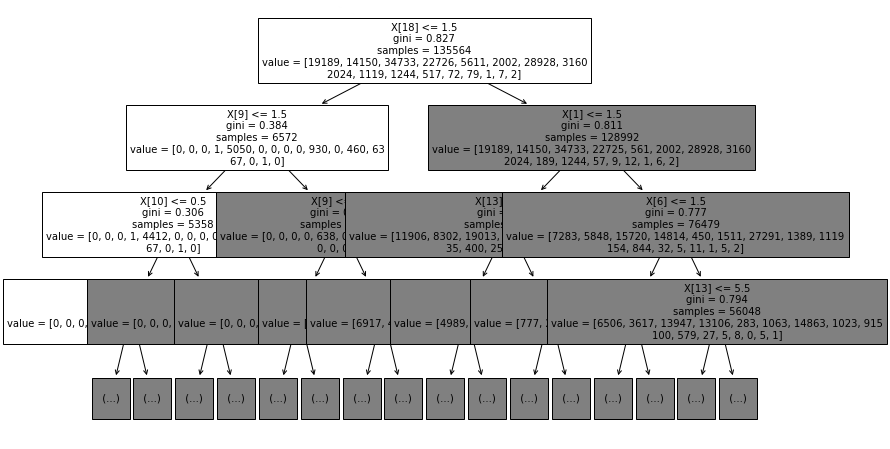

In [73]:
#plot first 3 rows of dt
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
a = tree.plot_tree(dt,fontsize=10, max_depth = 3)


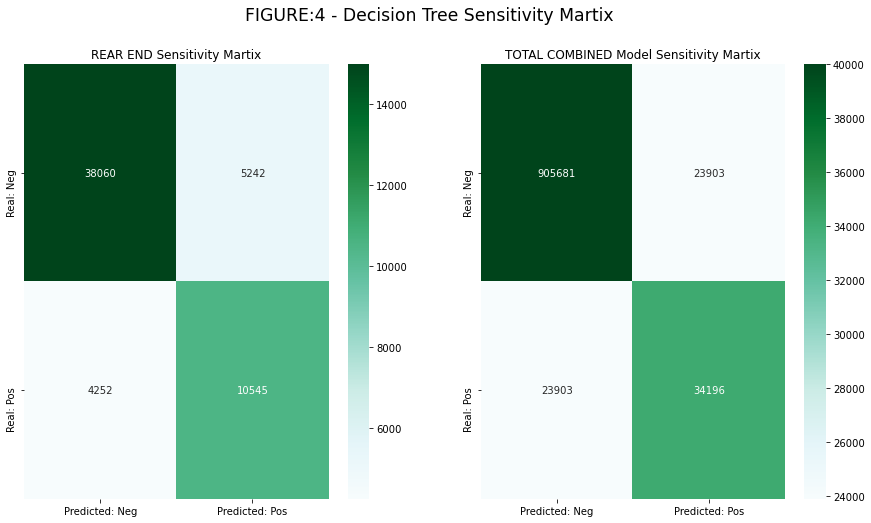

In [74]:
import seaborn as sn

##### Sensitivity for Decission Trees#################
# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

#Get FN FP TN AND TP of each classes classification (since a confusion matrix with 17 classes would crowded)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(int)
FN = FN.astype(int)
TP = TP.astype(int)
TN = TN.astype(int)

#plot rear end sensitivity matrix
matr_rearend  = [[TN[2],FP[2]],
        [FN[2],TP[2]]]
#create df of sensitivity matricies
cm_df_rearend = pd.DataFrame(matr_rearend ,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

fig, (ax1,ax2) = plt.subplots(1,2 , figsize = (15,8))
sn.heatmap(cm_df_rearend, annot=True, annot_kws={"size": 10},fmt='d', ax = ax1,cmap = 'BuGn', vmax = 15000
          )

#plot Total Model sensitivity matrix (just take the sum of all cm's for all classes)
matr_Total  = [[sum(TN),sum(FP)],
        [sum(FN),sum(TP)]]

cm_df_Total = pd.DataFrame(matr_Total,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

sn.heatmap(cm_df_Total, annot=True, annot_kws={"size": 10},fmt='d', ax = ax2,cmap = 'BuGn', vmax = 40000
          )



ax1.set_title('REAR END Sensitivity Martix')
ax2.set_title('TOTAL COMBINED Model Sensitivity Martix')

fig.suptitle('FIGURE:4 - Decision Tree Sensitivity Martix', size = 'xx-large' )

#FPR and recall
FPR1 = sum(FP)/(sum(FP)+sum(TN))
Recall1 = sum(TP)/(sum(TP)+sum(FN))
recall.append(Recall1)
FP_rate.append(FPR1)


## Jasmine
### Naive Bayes with Gaussian Classifier


In [75]:
%%time 
#get time it takes to run the model 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# print the accuracies
print("Training Accuracy Rate:",gnb.score(X_train,y_train))
print("Testing Accuracy Rate:",gnb.score(X_test,y_test))


# # record FP, recall rate
accuracy.append(gnb.score(X_test,y_test))

Training Accuracy Rate: 0.24209967247941933
Testing Accuracy Rate: 0.2424482349093788
Wall time: 1.14 s


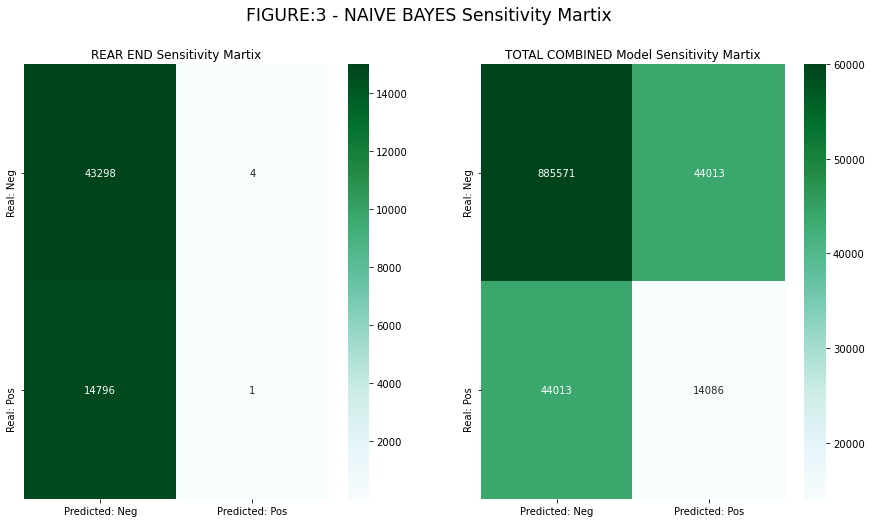

In [76]:
##### NAIVE BAYES #################
# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

# X_test.count
# (FP + FN + TP + TN)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(int)
FN = FN.astype(int)
TP = TP.astype(int)
TN = TN.astype(int)

#plot rear end sensitivity matrix
matr_rearend  = [[TN[2],FP[2]],
        [FN[2],TP[2]]]

cm_df_rearend = pd.DataFrame(matr_rearend,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

fig, (ax1,ax2) = plt.subplots(1,2 , figsize = (15,8))
sn.heatmap(cm_df_rearend, annot=True, annot_kws={"size": 10},fmt='d', ax = ax1,cmap = 'BuGn', vmax = 15000
          )

#plot Total Model sensitivity matrix
matr_Total  = [[sum(TN),sum(FP)],
        [sum(FN),sum(TP)]]

cm_df_Total = pd.DataFrame(matr_Total,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

sn.heatmap(cm_df_Total, annot=True, annot_kws={"size": 10},fmt='d', ax = ax2,cmap = 'BuGn', vmax = 60000
          )



ax1.set_title('REAR END Sensitivity Martix')
ax2.set_title('TOTAL COMBINED Model Sensitivity Martix')

fig.suptitle('FIGURE:3 - NAIVE BAYES Sensitivity Martix', size = 'xx-large' )

#FPR and recall
FPR2 = sum(FP)/(sum(FP)+sum(TN))
Recall2 = sum(TP)/(sum(TP)+sum(FN))
recall.append(Recall2)
FP_rate.append(FPR2)

### Random Forest Classifier

In [77]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# random forest classifier
rf = RandomForestClassifier(random_state = 0, max_depth = 20, min_samples_leaf = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

# print the accuracies
print("Training Accuracy Rate:", rf.score(X_train, y_train))
print("Testing Accuracy Rate:", rf.score(X_test, y_test))



# # record False Positive, recall rate
accuracy.append(rf.score(X_test,y_test))

Training Accuracy Rate: 0.7045380779557995
Testing Accuracy Rate: 0.6040723592488683
Wall time: 23.8 s


Feature: 0, Score: 0.28763
Feature: 1, Score: 0.10307
Feature: 2, Score: 0.07990
Feature: 3, Score: 0.07003
Feature: 4, Score: 0.05510


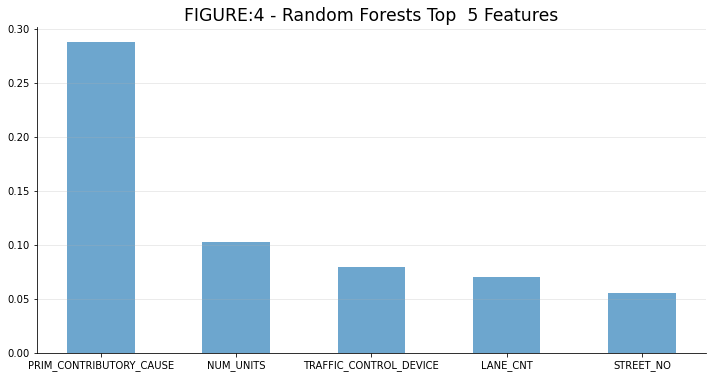

In [78]:
##### RF TOP FEATURES###################
importance = rf.feature_importances_
ind = np.argsort(-importance)[:5]

# summarize feature importance
for i,v in enumerate(importance[ind]):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
# plt.figure(figsize=(12,6))
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(df_features.columns[ind], importance[ind],
        alpha = 0.65,
        width = 0.5)
ax1.set_title('FIGURE:4 - Random Forests Top  5 Features', size = "xx-large")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='y', alpha = 0.3)

plt.show()


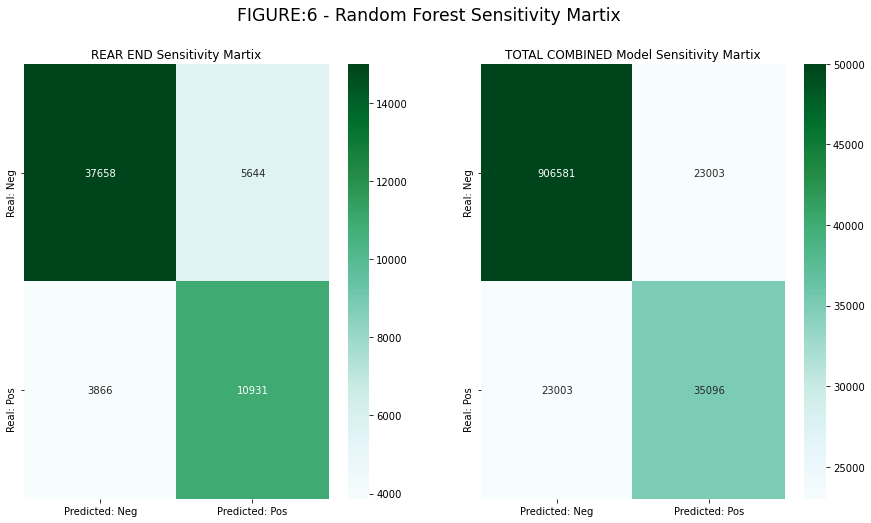

In [79]:
##### RF Sensitivity Matrix #################
# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

# X_test.count
# (FP + FN + TP + TN)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(int)
FN = FN.astype(int)
TP = TP.astype(int)
TN = TN.astype(int)

#plot rear end sensitivity matrix
matr_rearend  = [[TN[2],FP[2]],
        [FN[2],TP[2]]]

cm_df_rearend = pd.DataFrame(matr_rearend,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

fig, (ax1,ax2) = plt.subplots(1,2 , figsize = (15,8))
sn.heatmap(cm_df_rearend, annot=True, annot_kws={"size": 10},fmt='d', ax = ax1,cmap = 'BuGn', vmax = 15000
          )

#plot Total Model sensitivity matrix
matr_Total  = [[sum(TN),sum(FP)],
        [sum(FN),sum(TP)]]

cm_df_Total = pd.DataFrame(matr_Total,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

sn.heatmap(cm_df_Total, annot=True, annot_kws={"size": 10},fmt='d', ax = ax2,cmap = 'BuGn', vmax = 50000
          )



ax1.set_title('REAR END Sensitivity Martix')
ax2.set_title('TOTAL COMBINED Model Sensitivity Martix')

fig.suptitle('FIGURE:6 - Random Forest Sensitivity Martix', size = 'xx-large' )

#FPR and recall
FPR3 = sum(FP)/(sum(FP)+sum(TN))
Recall3 = sum(TP)/(sum(TP)+sum(FN))
recall.append(Recall3)
FP_rate.append(FPR3)

### KNN Classifier (with 5 neighbours)

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 5)
y = knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)
acc = knn3.score(X_test,y_test) # accuracy
accuracy.append(acc)
print("accuracy:", round(acc,4))

In [ ]:
y_pred = knn3.predict(X_test)

In [ ]:
##### KNN Sensitivity Matrix #################
# construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

# X_test.count
# (FP + FN + TP + TN)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(int)
FN = FN.astype(int)
TP = TP.astype(int)
TN = TN.astype(int)

#plot rear end sensitivity matrix
matr_rearend  = [[TN[2],FP[2]],
        [FN[2],TP[2]]]

cm_df_rearend = pd.DataFrame(matr_rearend,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

fig, (ax1,ax2) = plt.subplots(1,2 , figsize = (15,8))
sn.heatmap(cm_df_rearend, annot=True, annot_kws={"size": 10},fmt='d', ax = ax1,cmap = 'BuGn', vmax = 15000
          )

#plot Total Model sensitivity matrix
matr_Total  = [[sum(TN),sum(FP)],
        [sum(FN),sum(TP)]]

cm_df_Total = pd.DataFrame(matr_Total,
             index = ["Real: Neg","Real: Pos"],
             columns = ["Predicted: Neg","Predicted: Pos"])

sn.heatmap(cm_df_Total, annot=True, annot_kws={"size": 10},fmt='d', ax = ax2,cmap = 'BuGn', vmax = 50000
          )



ax1.set_title('REAR END Sensitivity Martix')
ax2.set_title('TOTAL COMBINED Model Sensitivity Martix')

fig.suptitle('FIGURE:2 - KNN Sensitivity Martix', size = 'xx-large' )

#FPR and recall
FPR4 = sum(FP)/(sum(FP)+sum(TN))
Recall4 = sum(TP)/(sum(TP)+sum(FN))
recall.append(Recall4)
FP_rate.append(FPR4)

### FINAL RESULTS 

In [ ]:
results = pd.DataFrame({"Accuracy":accuracy, "False Positive Rate":FP_rate},
            index = ["Decision Trees","NAIVE BAYES","Random Forest","KNN"])

#add runtimes and test stats
results["Runtime"] = ['1.18 s', '1.63 s', '30.1 s','22.1 s']
results["Test Statistic (Z)"] = [259.5,103.3,268.7,129.1]
results["P-Value"] = ['>0.00001','>0.00001','>0.00001','>0.00001']
results